# Library Load

In [190]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

# Dataset Load

In [191]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [192]:
path = '/gdrive/My Drive/[Dacon]신용카드 연체 예측 AI/'
train = pd.read_csv(path + 'train.csv', index_col="index")
test = pd.read_csv(path + 'test.csv', index_col="index")
train.shape, test.shape

((26457, 19), (10000, 18))

# Dataset 기본 정보 탐색



> ### 전체 기본 정보




In [193]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  object 
 1   car            10000 non-null  object 
 2   reality        10000 non-null  object 
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  float64
 5   income_type    10000 non-null  object 
 6   edu_type       10000 non-null  object 
 7   family_type    10000 non-null  object 
 8   house_type     10000 non-null  object 
 9   DAYS_BIRTH     10000 non-null  int64  
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  FLAG_MOBIL     10000 non-null  int64  
 12  work_phone     10000 non-null  int64  
 13  phone          10000 non-null  int64  
 14  email          10000 non-null  int64  
 15  occyp_type     6848 non-null   object 
 16  family_size    10000 non-null  float64
 17  begin_month    10000 non-null  float64
dtypes:

None

> ### 결측치 탐색

In [194]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [195]:
test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

*   **occyp_type 결측치 대체 필요함**







> ### 통계 정보 탐색

In [196]:
train.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [197]:
test.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.434700,1.850433e+05,-16020.466400,59776.690400,1.0,0.227600,0.296300,0.085600,2.202700,-26.272400
std,0.729102,1.015398e+05,4197.672887,138121.224504,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19483.250000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,0.000000,1.575000e+05,-15606.000000,-1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000
75%,1.000000,2.250000e+05,-12539.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,5.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.000000




> ### 전체 시각화




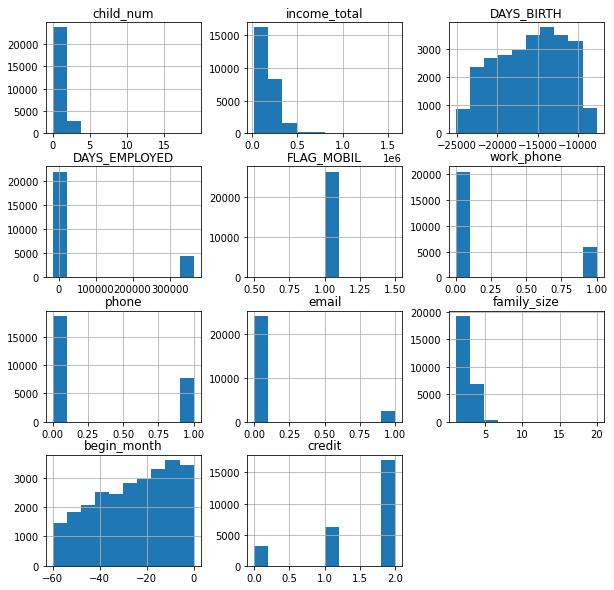

In [198]:
# 수치형 시각화
train.hist(figsize=(10,10));



*   **음수의 값을 가지는 DAYS_BIRTH / begin_month / DAYS_EMPLOYED를 양수로 바꾸기**
*   **변수 간의 scale차이가 심함 => 스케일링 필요**



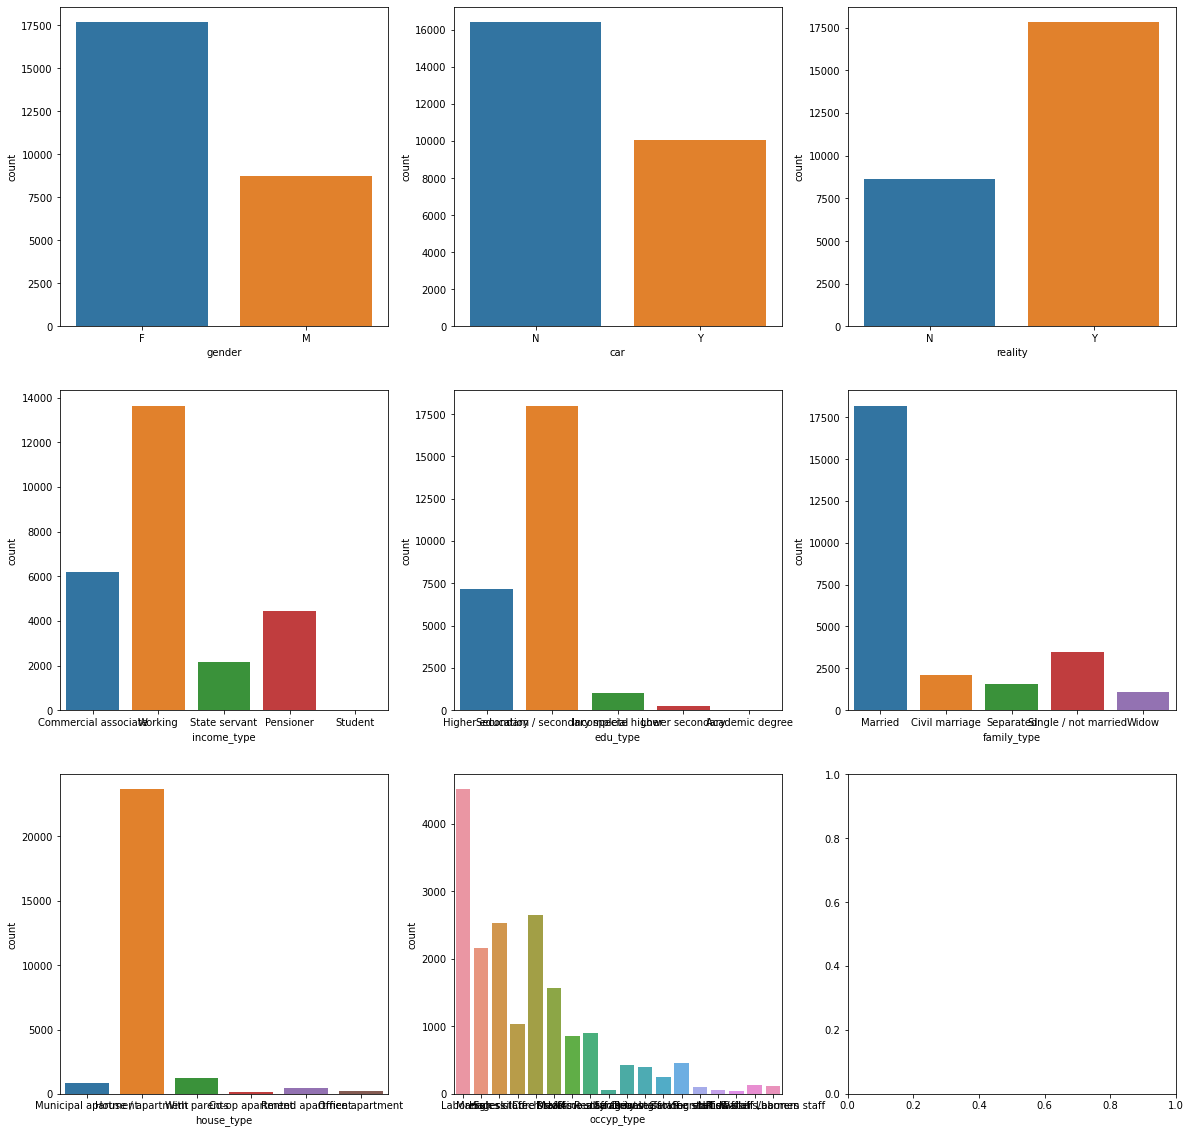

In [199]:
# 범주형 시각화
cols = train.select_dtypes(include="O").columns

fig, ax = plt.subplots(len(cols)//3 + 1,3,figsize=(20,20))
for i in range(0,len(cols),3):
    sns.countplot(data=train, x=cols[i], ax=ax[i//3][0])
    if len(cols)>i+1:
        sns.countplot(data=train, x=cols[i+1], ax=ax[i//3][1])
    if len(cols)>i+2:
        sns.countplot(data=train, x=cols[i+2], ax=ax[i//3][2])

*   **edu_type / house_type / accyp_type 희솟값 처리 필요**



# Data Preprocessing 1



> ### 수치형 데이터 전처리



In [200]:
# DAYS_BIRTH
# DAYS_BIRTH(출생일)을 변형하여 AGE(나이) 파생변수 만들기

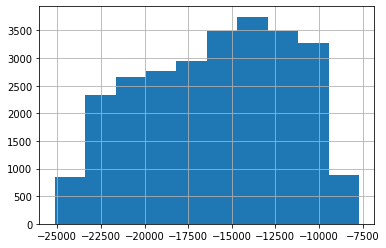

In [201]:
train['DAYS_BIRTH'].hist()

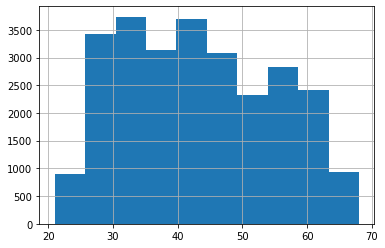

In [202]:
train['Age'] = (-train['DAYS_BIRTH'])//365
train['Age'].hist()

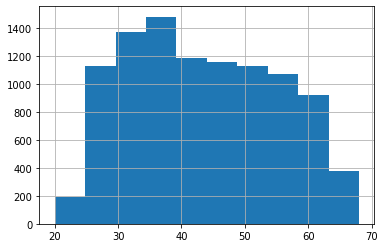

In [203]:
test['Age'] = (-test['DAYS_BIRTH'])//365
test['Age'].hist()

In [204]:
# DAYS_EMPLOYED
# DAYS_EMPLOYED(업무 시작일)이 양수면 고용되지 않은 상태 => 모두 0으로 바꾸기
# DAYS_EMPLOYED(업무 시작일)을 일에서 연으로 나타내어 Year_EMPLOYED 파생변수 생성하기

In [205]:
train.loc[train['DAYS_EMPLOYED']>=0,'DAYS_EMPLOYED'] = 0 

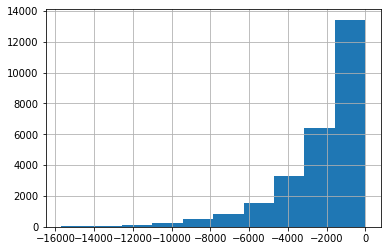

In [206]:
train['DAYS_EMPLOYED'].hist()

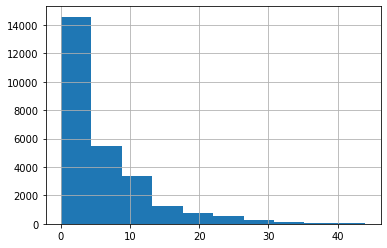

In [207]:
train['Year_EMPLOYED'] = (-train['DAYS_EMPLOYED'])//356
train['Year_EMPLOYED'].hist()

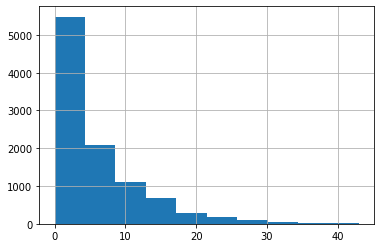

In [208]:
test.loc[test['DAYS_EMPLOYED']>=0,'DAYS_EMPLOYED'] = 0 
test['Year_EMPLOYED'] = (-test['DAYS_EMPLOYED'])//356
test['Year_EMPLOYED'].hist()

In [209]:
# begin_month 
# begin_month(신용카드 발급 월) 양수로 나타내기

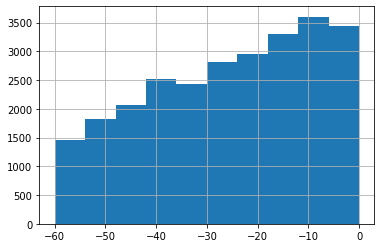

In [210]:
train['begin_month'].hist()

In [211]:
train['begin_month'] = -train['begin_month']

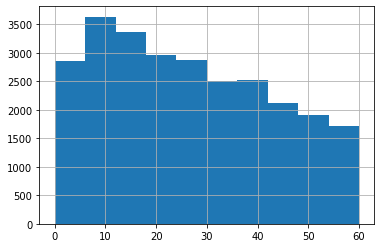

In [212]:
train['begin_month'].hist()

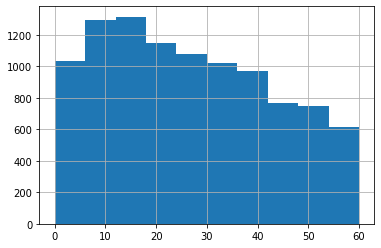

In [213]:
test['begin_month'] = -test['begin_month']
test['begin_month'].hist()

> ### 범주형 데이터 전처리

In [214]:
# edu_type
# secondary special : 보조 특수
# Higher education : 고등 교육
# Incomplete higher : 불안전한 상위
# Lower secondary : 중학교
# Academic degree : 학업 학위

In [215]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [216]:
train.loc[(train['edu_type']=="Lower secondary")|(train['edu_type']=="Academic degree"),"edu_type"] = "Else"

In [217]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Else                               280
Name: edu_type, dtype: int64

In [218]:
test.loc[(test['edu_type']=="Lower secondary")|(test['edu_type']=="Academic degree"),"edu_type"] = "Else"
test['edu_type'].value_counts()

Secondary / secondary special    6782
Higher education                 2702
Incomplete higher                 390
Else                              126
Name: edu_type, dtype: int64

In [219]:
# house_type 

In [220]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [221]:
train.loc[(train['house_type']=="Office apartment")|(train['house_type']=="Co-op apartment"),"house_type"] = "Else"

In [222]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Else                     300
Name: house_type, dtype: int64

In [223]:
test.loc[(test['house_type']=="Office apartment")|(test['house_type']=="Co-op apartment"),"house_type"] = "Else"
test['house_type'].value_counts()

House / apartment      8895
With parents            519
Municipal apartment     310
Rented apartment        146
Else                    130
Name: house_type, dtype: int64

In [224]:
# occyp_type

In [225]:
train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [226]:
occyp_type_vc = train['occyp_type'].value_counts()
ot_idx = occyp_type_vc[occyp_type_vc<200].index
ot_idx

Index(['Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries',
       'Realty agents', 'HR staff', 'IT staff'],
      dtype='object')

In [227]:
train.loc[train['occyp_type'].isin(ot_idx),'occyp_type'] = "Else"

In [228]:
train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Else                      514
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Name: occyp_type, dtype: int64

In [229]:
test.loc[test['occyp_type'].isin(ot_idx),'occyp_type'] = "Else"
test['occyp_type'].value_counts()

Laborers                 1699
Sales staff               946
Core staff                945
Managers                  845
Drivers                   563
Medicine staff            343
High skill tech staff     343
Accountants               339
Else                      210
Cooking staff             198
Security staff            168
Cleaning staff            148
Private service staff     101
Name: occyp_type, dtype: int64

In [230]:
# child_num

In [231]:
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [232]:
train.loc[train['child_num']>4, 'child_num'] = 4

In [233]:
train['child_num'].value_counts()

0    18340
1     5386
2     2362
3      306
4       63
Name: child_num, dtype: int64

In [234]:
test.loc[test['child_num']>4, 'child_num'] = 4
test['child_num'].value_counts()

0    6861
1    2106
2     894
3     113
4      26
Name: child_num, dtype: int64

> ### Encoding

In [235]:
cols = train.select_dtypes(include="O").columns

from sklearn import preprocessing

for col in cols:
  le = preprocessing.LabelEncoder()
  train[col] = le.fit_transform(train[[col]])
  test[col] = le.transform(test[[col]])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# EDA



> ### 상관관계



In [236]:
corr = train.corr()
corr

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,Age,Year_EMPLOYED
gender,1.000000,0.362320,-0.048927,0.077899,0.198455,0.103083,0.006526,-0.101969,0.052733,0.201138,...,NaN,0.064316,-0.027078,0.000108,-0.104070,0.111060,-0.007707,0.001562,-0.200988,-0.038863
car,0.362320,1.000000,-0.016599,0.104266,0.213432,0.048361,-0.097084,-0.124280,0.012091,0.156883,...,NaN,0.026124,-0.013730,0.018904,-0.104949,0.149463,0.029955,0.007761,-0.156431,-0.000480
reality,-0.048927,-0.016599,1.000000,-0.001101,0.035377,-0.048468,0.006482,0.028144,-0.170056,-0.130241,...,NaN,-0.208648,-0.065553,0.051085,0.042421,-0.006667,-0.003863,-0.009387,0.129745,-0.035965
child_num,0.077899,0.104266,-0.001101,1.000000,0.033452,0.107297,-0.046945,-0.169025,0.018241,0.343724,...,NaN,0.052422,-0.011392,0.017700,-0.129651,0.879704,0.007469,0.002786,-0.343728,0.039940
income_total,0.198455,0.213432,0.035377,0.033452,1.000000,-0.075175,-0.207697,-0.005802,-0.014779,0.064155,...,NaN,-0.034207,0.019013,0.089882,-0.085433,0.023839,0.018047,0.008555,-0.064009,0.083144
income_type,0.103083,0.048361,-0.048468,0.107297,-0.075175,1.000000,0.057190,-0.050790,0.031638,0.211466,...,NaN,0.161857,0.004436,-0.020060,-0.182368,0.107698,-0.002750,-0.008163,-0.211582,0.180043
edu_type,0.006526,-0.097084,0.006482,-0.046945,-0.207697,0.057190,1.000000,0.012321,-0.029534,-0.142630,...,NaN,-0.021090,-0.038392,-0.089612,0.081847,-0.038823,-0.017238,0.012582,0.142999,-0.003521
family_type,-0.101969,-0.124280,0.028144,-0.169025,-0.005802,-0.050790,0.012321,1.000000,0.013096,-0.104556,...,NaN,-0.065483,-0.014388,-0.015427,0.049020,-0.545149,-0.030711,-0.005230,0.104291,-0.049397
house_type,0.052733,0.012091,-0.170056,0.018241,-0.014779,0.031638,-0.029534,0.013096,1.000000,0.204305,...,NaN,0.030092,-0.012297,0.016231,-0.053150,-0.001122,-0.030632,-0.007038,-0.203887,-0.032581
DAYS_BIRTH,0.201138,0.156883,-0.130241,0.343724,0.064155,0.211466,-0.142630,-0.104556,0.204305,1.000000,...,NaN,0.178752,-0.029247,0.111238,-0.315196,0.298108,-0.057306,-0.025187,-0.999692,0.002992


In [237]:
train["FLAG_MOBIL"].value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64



*   **FLAG_MOBIL 값 모두 같음 => 삭제**



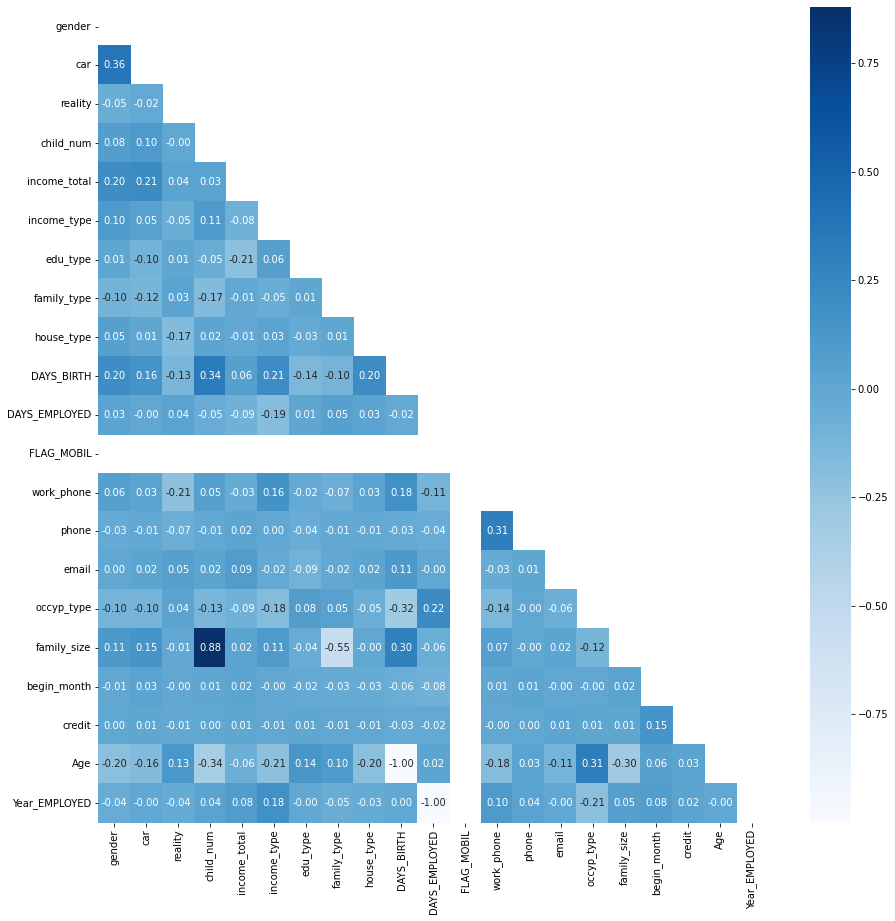

In [238]:
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(15,15))
sns.heatmap(data=corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

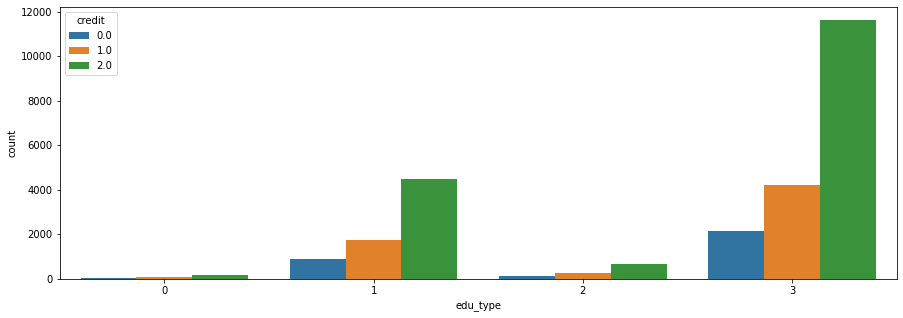

In [239]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='edu_type', hue="credit")

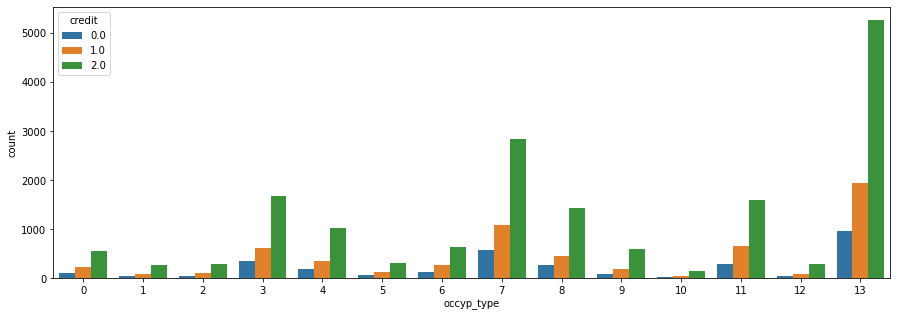

In [240]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='occyp_type', hue="credit")

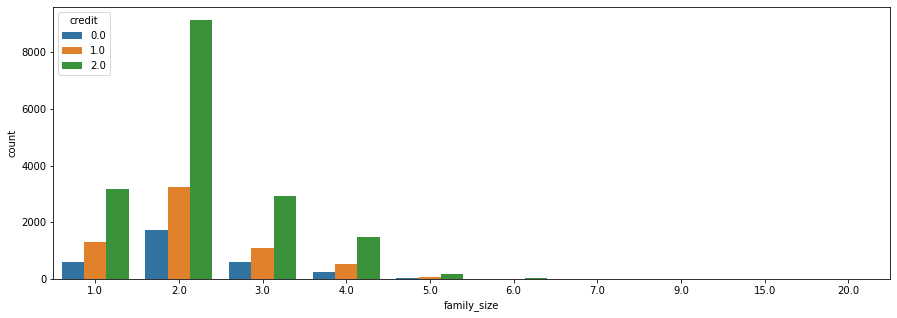

In [241]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='family_size', hue="credit")

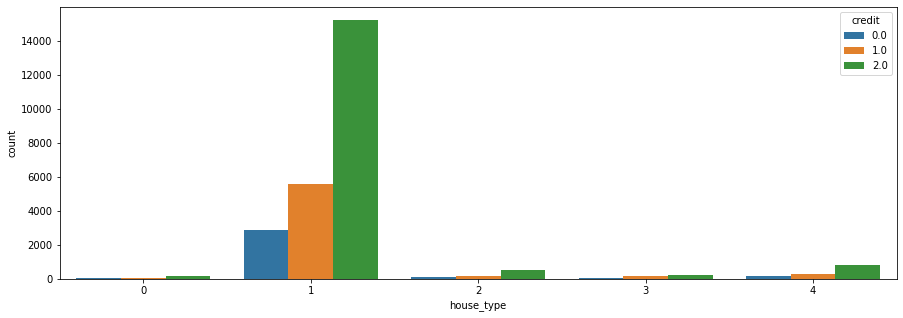

In [242]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='house_type', hue="credit")

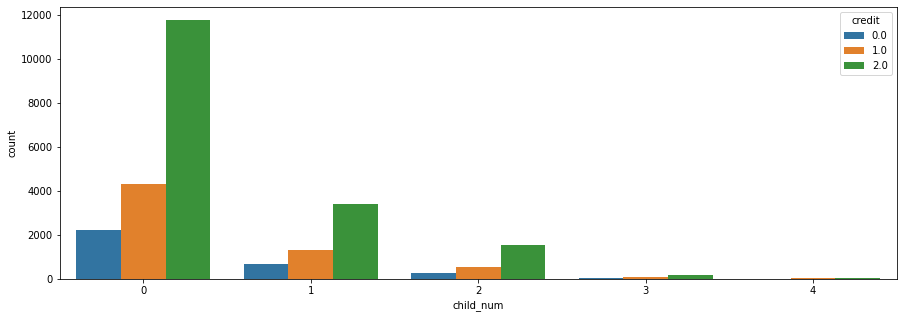

In [243]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='child_num', hue="credit")

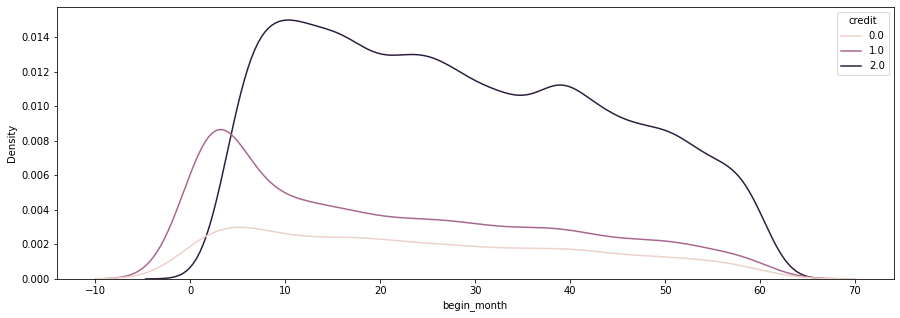

In [244]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=train, x='begin_month', hue="credit")



> ### feature 선택



In [245]:
train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'credit', 'Age', 'Year_EMPLOYED'],
      dtype='object')

In [246]:
features = ['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type',
       'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'Age', 'Year_EMPLOYED']

In [247]:
label = 'credit'

In [248]:
X_train = train[features]
y_train = train[label]

X_test = test[features]

# Data Preprocessing 2

In [249]:
y_train.value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [250]:
# 성능 안좋아서 삭제함
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train,y_train = smote.fit_resample(X_train, y_train)

In [251]:
y_train.value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

> ### 결측치 대체

In [252]:
# occyp_type

In [253]:
train['occyp_type'].value_counts()

13    8171
7     4512
3     2646
11    2539
8     2167
4     1575
6     1040
0      902
9      864
5      514
2      457
12     424
1      403
10     243
Name: occyp_type, dtype: int64

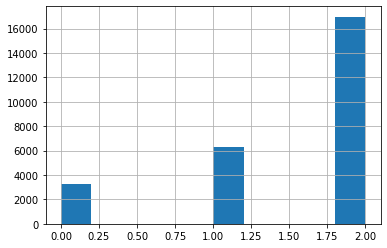

In [254]:
train.loc[~train['occyp_type'].isnull(),'credit'].hist()



*   **Nan인 값에 대해 Credit의 분포를 확인해본 결과, 분포가 다양했기 때문에 모두 기타로 처리하기 보다는 보간법을 통해 최대한 의미 있게 채우는 것이 좋겠다고 생각함**



In [255]:
# KNN 보간법
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=50)
tmp = imputer.fit_transform(X_train)
tmp2 = imputer.transform(X_test)

In [256]:
X_train_Im = pd.DataFrame(tmp,columns=X_train.columns)
X_test_Im = pd.DataFrame(tmp2,columns=X_test.columns)

In [257]:
X_train_Im.isnull().sum().sum(), X_test_Im.isnull().sum().sum()

(0, 0)

In [258]:
display(X_train_Im.head(2))
display(X_test_Im.head(2))

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,begin_month,Age,Year_EMPLOYED
0,0.0,0.0,0.0,0.0,202500.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,13.0,2.0,6.0,38.0,13.0
1,0.0,0.0,1.0,1.0,247500.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,7.0,3.0,5.0,31.0,4.0


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,begin_month,Age,Year_EMPLOYED
0,1.0,1.0,0.0,0.0,112500.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,13.0,2.0,60.0,60.0,0.0
1,0.0,0.0,1.0,0.0,135000.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0,36.0,51.0,24.0




> ### 정규화



In [259]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_Im)
X_test_final = scaler.transform(X_test_Im)

In [260]:
X_train_final.shape, X_test_final.shape

((26457, 17), (10000, 17))

# Model Build

In [261]:
class Model_build(tf.keras.Model):
    def __init__(self):
        super(Model_build, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='GlorotUniform')
        self.dense2 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='GlorotUniform')
        self.dense3 = tf.keras.layers.Dense(3, activation='softmax')
        self.drop1 = tf.keras.layers.Dropout(0.2)
        self.drop2 = tf.keras.layers.Dropout(0.2)

    def call(self, input):
        x = self.dense1(input)
        x = self.drop1(x)
        x = self.dense2(x)
        x = self.drop2(x)
        output = self.dense3(x)
        return output

    def summary(self, input_shape):
        inputs = tf.keras.layers.Input(input_shape)
        tf.keras.Model(inputs, self.call(inputs)).summary()


In [262]:
input_shape = (500,X_train_final.shape[1])

model = Model_build()
model.build(input_shape=input_shape)

# 모델 요약
model.summary(input_shape=input_shape)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 500, 17)]         0         
                                                                 
 dense_27 (Dense)            (None, 500, 128)          2304      
                                                                 
 dropout_14 (Dropout)        (None, 500, 128)          0         
                                                                 
 dense_28 (Dense)            (None, 500, 128)          16512     
                                                                 
 dropout_15 (Dropout)        (None, 500, 128)          0         
                                                                 
 dense_29 (Dense)            (None, 500, 3)            387       
                                                                 
Total params: 19,203
Trainable params: 19,203
Non-trainable

# 학습 & 예측

In [263]:
# 컴파일 및 학습
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_final, y_train, epochs=400, verbose=1, validation_split=0.2, shuffle=True, batch_size=500)

Epoch 1/400
43/43 [==============================] - 3s 24ms/step - loss: 0.9196 - accuracy: 0.6207 - val_loss: 0.8849 - val_accuracy: 0.6328
Epoch 2/400
43/43 [==============================] - 0s 10ms/step - loss: 0.8761 - accuracy: 0.6444 - val_loss: 0.8765 - val_accuracy: 0.6334
Epoch 3/400
43/43 [==============================] - 0s 8ms/step - loss: 0.8684 - accuracy: 0.6476 - val_loss: 0.8716 - val_accuracy: 0.6387
Epoch 4/400
43/43 [==============================] - 0s 9ms/step - loss: 0.8609 - accuracy: 0.6513 - val_loss: 0.8670 - val_accuracy: 0.6425
Epoch 5/400
43/43 [==============================] - 0s 8ms/step - loss: 0.8567 - accuracy: 0.6553 - val_loss: 0.8602 - val_accuracy: 0.6523
Epoch 6/400
43/43 [==============================] - 0s 9ms/step - loss: 0.8517 - accuracy: 0.6598 - val_loss: 0.8554 - val_accuracy: 0.6572
Epoch 7/400
43/43 [==============================] - 0s 8ms/step - loss: 0.8466 - accuracy: 0.6652 - val_loss: 0.8540 - val_accuracy: 0.6621
Epoch 8/400

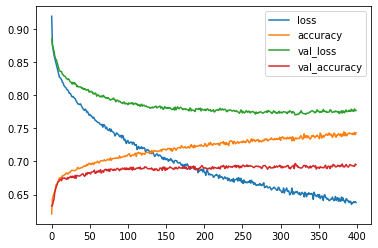

In [264]:
df_hist = pd.DataFrame(history.history)
df_hist.plot()

In [265]:
y_predict = model.predict(X_test_final)
y_predict

313/313 [==============================] - 0s 1ms/step


array([[0.07925134, 0.1043594 , 0.8163893 ],
       [0.07210762, 0.21936774, 0.70852464],
       [0.19522548, 0.21368934, 0.5910852 ],
       ...,
       [0.17271931, 0.20317484, 0.6241059 ],
       [0.09728554, 0.49084395, 0.4118704 ],
       [0.00611261, 0.12649685, 0.86739045]], dtype=float32)

# 제출 파일

In [266]:
submit = pd.read_csv(path + 'sample_submission.csv')

In [267]:
submit[['0','1','2']] = y_predict

In [268]:
submit.head()

,index,0,1,2
0,26457,0.079251,0.104359,0.816389
1,26458,0.072108,0.219368,0.708525
2,26459,0.195225,0.213689,0.591085
3,26460,0.236675,0.177255,0.586070
4,26461,0.045685,0.172626,0.781689


In [270]:
submit.to_csv(path + "submission_0.6952.csv",index=False)